### Задание 1

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [3]:
X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns = ["price"])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)

In [8]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

In [9]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [10]:
from sklearn.metrics import r2_score

In [11]:
r2 = r2_score(y_test, y_pred)
r2

0.711226005748496

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [14]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

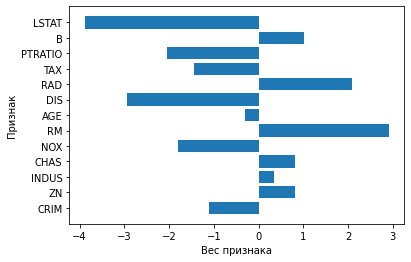

In [15]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [16]:
y_pred_scaled = lr.predict(X_test_scaled)

In [17]:
r2 = r2_score(y_test, y_pred_scaled)
r2

0.7112260057484934

### Задание 2

In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [19]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [20]:
X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns = ["price"])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [22]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [23]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([22.80641237, 31.13146352, 16.33912494, 23.81072598, 17.13952074,
       21.8322837 , 19.89574701, 14.75411774, 21.2408346 , 20.89865761,
       20.2028696 , 19.95659298,  8.03651316, 21.51673023, 19.36048089,
       25.28222025, 18.82002442,  8.47636459, 45.9477    , 15.50141896,
       24.37448371, 23.98037718, 14.54950214, 23.57447941, 15.05119767,
       15.23703316, 21.59141811, 13.90617333, 19.67698308, 21.0552311 ,
       19.69950085, 23.2483229 , 29.99451024, 20.15961264, 14.39724675,
       16.02131035, 34.26043401, 19.19342625, 21.17764473, 24.22833434,
       18.60497   , 29.57765089, 45.5585    , 19.62038232, 22.575541  ,
       14.0331484 , 15.76855872, 24.50013129, 19.15469322, 28.28791716,
       21.35262285, 33.89102953, 17.67031122, 26.25583284, 45.51992393,
       21.89588357, 15.85210261, 32.38172361, 22.14020328, 20.61773671,
       25.39990971, 33.63617562, 30.10425708, 18.97044937, 27.14227131,
       16.90607   , 13.90610446, 23.10904339, 28.86343833, 15.57

In [26]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [27]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.073446,0.557259,6.325672,68.799718,3.765874,9.437853,407.042373,18.277966,359.701808,12.421130
std,8.315831,22.608457,6.938651,0.261237,0.116792,0.719211,27.665360,2.126032,8.639971,166.522237,2.256792,86.924779,7.112402
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782500,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.350000,3.107300,5.000000,330.000000,18.600000,391.600000,10.925000
75%,3.281688,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200000,396.172500,16.225000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Посчтитал R2 через sklearn.metrics import r2_score

In [28]:
r2 = r2_score(y_test, y_pred)
r2

0.87472606157312

И посчтитал R2 через метод в RandomForestRegressor, значения совпали

In [29]:
model.score(X_test, y_test)

0.87472606157312

Вывод - модель RandomForestRegressor в данном случае работает лучше, т.к. R2 ближе к 1 и составляет 0.87 против 0.71 у LinearRegression.
После стандартизации R2 составил в LinearRegression не изменился.

### *Задание 3

In [30]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02
mean,-1.262330e-16,-4.829784e-17,3.724736e-15,-6.680155e-17,-5.443229e-15,-1.594064e-15,-6.962416e-17,-2.244595e-15,-8.185543e-17,-1.890359e-16,1.728498e-14,8.116546e-15,-7.533208e-16
std,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00
min,-4.167624e-01,-5.051250e-01,-1.432137e+00,-2.815463e-01,-1.477013e+00,-3.428977e+00,-2.385402e+00,-1.241753e+00,-9.779889e-01,-1.323270e+00,-2.519507e+00,-4.140252e+00,-1.505295e+00
25%,-4.079402e-01,-5.051250e-01,-8.663857e-01,-2.815463e-01,-9.196796e-01,-6.073179e-01,-8.243866e-01,-7.970573e-01,-6.302741e-01,-7.700089e-01,-7.223839e-01,1.967778e-01,-7.826466e-01
50%,-3.869638e-01,-5.051250e-01,-2.082672e-01,-2.815463e-01,-1.651363e-01,-1.366932e-01,3.094984e-01,-3.102052e-01,-5.143691e-01,-4.633100e-01,1.428974e-01,3.674826e-01,-2.106528e-01
75%,-2.266349e-02,3.807519e-01,1.005500e+00,-2.815463e-01,6.322788e-01,4.957956e-01,8.931822e-01,7.700449e-01,1.687825e+00,1.557294e+00,8.528718e-01,4.201600e-01,5.355791e-01
max,1.029691e+01,3.702790e+00,2.396785e+00,3.551814e+00,2.690124e+00,3.417358e+00,1.129371e+00,3.938069e+00,1.687825e+00,1.827911e+00,1.651593e+00,4.285411e-01,3.597242e+00


In [31]:
print(model.feature_importances_)

[0.03167574 0.00154252 0.00713813 0.00123624 0.01426897 0.40268179
 0.01429864 0.06397257 0.00528122 0.01152493 0.01808108 0.01245085
 0.41584732]


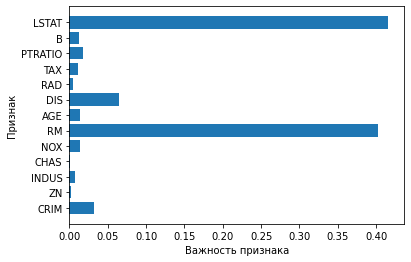

In [32]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline
plt.barh(feature_names, model.feature_importances_)

plt.xlabel("Важность признака")
plt.ylabel("Признак")

plt.show()

Получается, что признаки LSTAT и RM дают самую большую важность. Статус населения и среднее кол-во комнат в доме.